# DECISION TREE CLASSIFIER (C5.0) 


## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing , tree
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## IMPORT DATASET

In [2]:
data = pd.read_csv('Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## DATA PREPROCESSING

### Understanding basic information of the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
data.shape

(600, 6)

In [6]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [7]:
data[data.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [8]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [9]:
data.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


### Converting the dependent variable to categorical 

In [11]:
data['Taxable.Income']=np.where(data['Taxable.Income']<=30000,'Risky','Good')
data.head(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


### Visualization

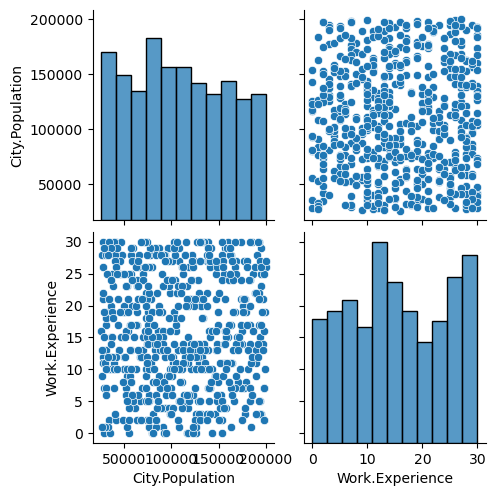

In [12]:
sns.pairplot(data = data)

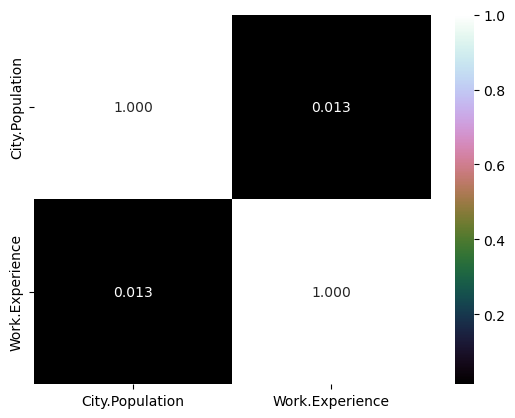

In [13]:
sns.heatmap(data.corr(),cmap='cubehelix',annot= True , fmt='.3f')
plt.show()

### Label Encoding

In [14]:
data['Taxable.Income'].unique()

array(['Good', 'Risky'], dtype=object)

In [15]:
label_encoder = preprocessing.LabelEncoder()
data['Taxable.Income'] = label_encoder.fit_transform(data['Taxable.Income'])
data['Undergrad'] = label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status'] = label_encoder.fit_transform(data['Marital.Status'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])

In [16]:
#data['Sales']=data['Sales'].astype('category')
data['Marital.Status']=data['Marital.Status'].astype('category')
data['Urban']=data['Urban'].astype('category')
data['Undergrad']=data['Undergrad'].astype('category')

In [17]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0


In [18]:
data['Taxable.Income'].unique()

array([0, 1])

In [19]:
data['Marital.Status'].unique()

[2, 0, 1]
Categories (3, int64): [0, 1, 2]

In [20]:
data['Urban'].unique()

[1, 0]
Categories (2, int64): [0, 1]

In [21]:
data['Undergrad'].unique()

[0, 1]
Categories (2, int64): [0, 1]

### Seperate Dependent and Independent Features

In [26]:
array = data.values
x = array[:,[0,1,3,4,5]]
y = array[:,2]

### Splitting Data Into Training and Testing

In [140]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=50)

## BUILDING THE MODEL

In [160]:
model = DecisionTreeClassifier(criterion= 'entropy', max_depth= 2).fit(x_train,y_train)
model

DecisionTreeClassifier(criterion='entropy', max_depth=2)

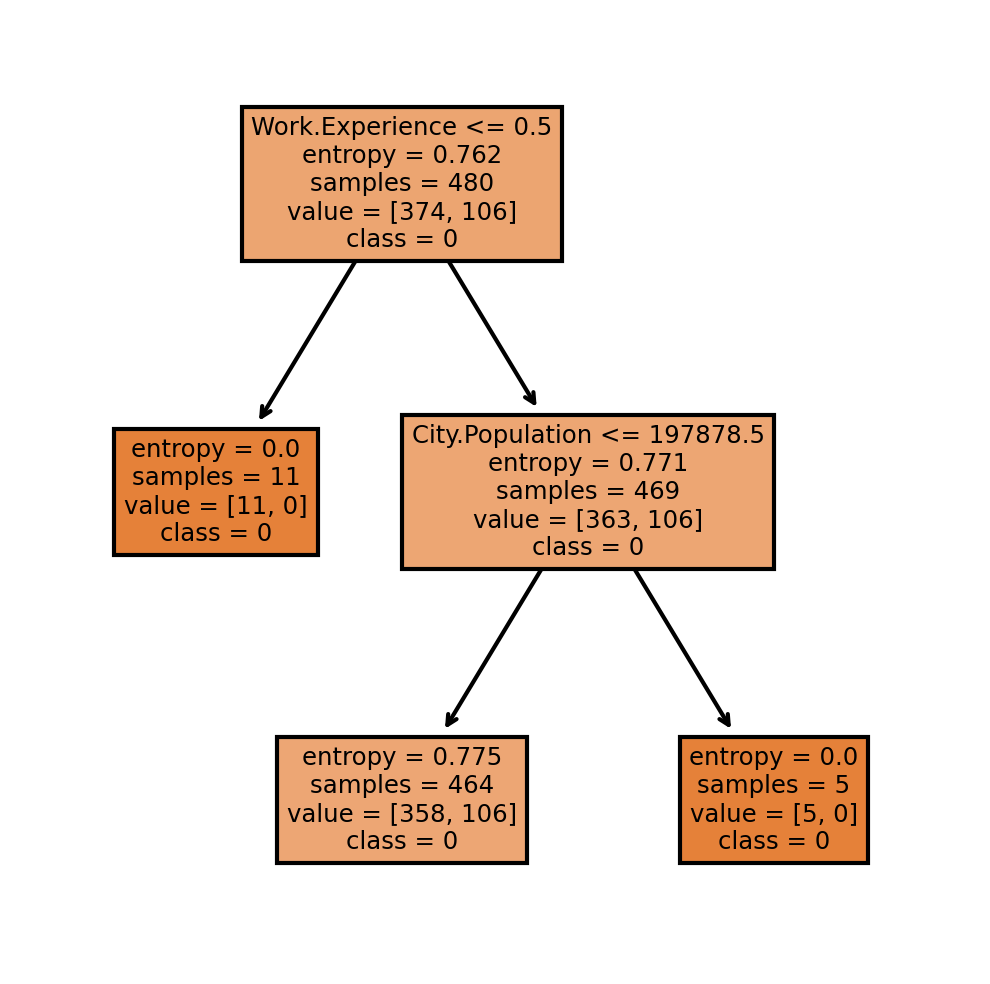

In [161]:
fn=['Undergrad','Martial.Status','City.Population','Work.Experience','Urban']
cn=['0', '1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True,)
plt.show()

In [162]:
model.feature_importances_

array([0.        , 0.        , 0.31666689, 0.68333311, 0.        ])

## Visualizing Important Features

<function matplotlib.pyplot.show(close=None, block=None)>

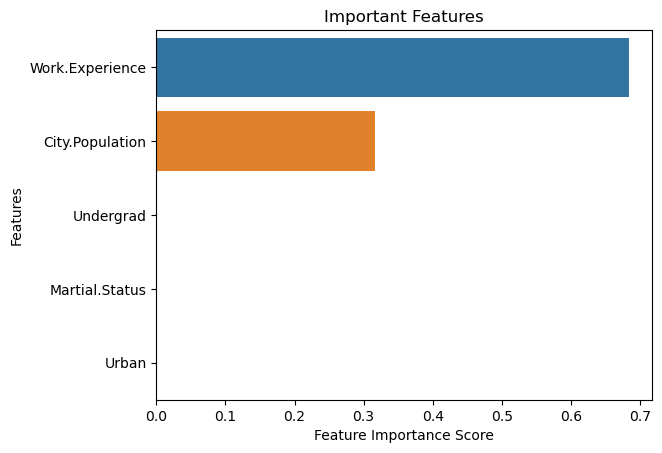

In [163]:
impfeatures=pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False)
sns.barplot(x=impfeatures,y=impfeatures.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features')
plt.show

## Predicting On The Data

In [164]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

0    120
dtype: int64

In [165]:
pd.crosstab(y_test,preds)

col_0,0
row_0,
0,102
1,18


## CALCULATING ACCURACY

In [166]:
np.mean(preds==y_test)

0.85

# The accuraacy of Decision Tree C5.0 model is 85%


### We can use a different model of decision tree improve the accuracy of the model

# DECISION TREE CLASSIFIER (CART)

In [169]:
model_gini = DecisionTreeClassifier(criterion='gini' , max_depth=3)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

## PREDICTION 

In [170]:
pred = model_gini.predict(x_test)
pd.Series(pred).value_counts()

0    120
dtype: int64

In [171]:
pd.crosstab(y_test,pred)

col_0,0
row_0,
0,102
1,18


## CALCULATING ACCURACY

In [172]:
np.mean(pred == y_test)

0.85

# DECISION TREE (REGRESSION) MODEL

In [173]:
array = data.values
x = array[:,[0,1,3,4,5]]
y = array[:,2]

In [174]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=13)

In [178]:
model_reg = DecisionTreeRegressor(max_depth=2).fit(x_train,y_train)

In [179]:
model_reg.score(x_test,y_test)

-0.08798612037407572

In [180]:
pre=model_reg.predict(x_test)
pd.Series(pre).value_counts()

0.232143    110
0.095238      7
0.000000      3
dtype: int64

In [181]:
np.mean(pre == y_test)

0.016666666666666666

In [182]:
model_reg.feature_importances_

array([0.       , 0.       , 0.4064619, 0.5935381, 0.       ])

<function matplotlib.pyplot.show(close=None, block=None)>

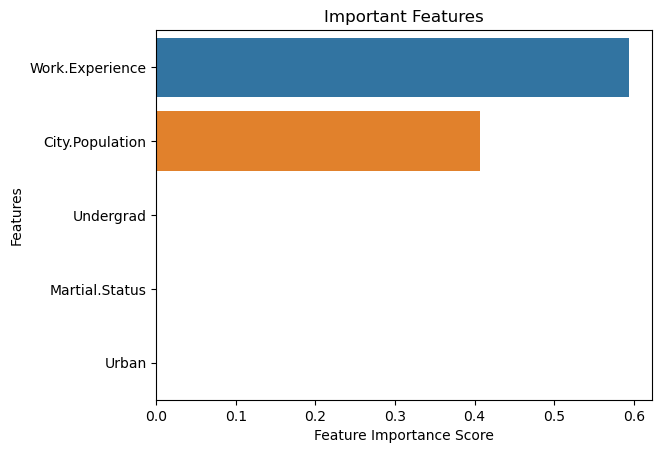

In [183]:
impfeature=pd.Series(model_reg.feature_importances_,index=fn).sort_values(ascending=False)
sns.barplot(x=impfeature,y=impfeature.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features')
plt.show